# Three steps to prepare a session:
1. Submit local PDB file
2. Submit local MOL2 file
3. Submit session preparation request

In [19]:
import requests
import json 
  
def PrepNewSession(parms):
  """
  Wrapper of PrepareSession function to submit a request to prepare a new session. 
  Available settings: 
    ['water', 'nwaters', 'fullpdb', 'JOBID', 'waterchoice', 'hischoice', 
    'chainsel', 'ligand', 'ligmol2', 'ligsdf', 'maxloopl', 'nrsteps', 
    'mini_mode', 'mini_grms', 'sc_polar', 'sc_impsolv', 'pdb_tolerance_a', 'pdb_tolerance_b', 
    'appendix', 'unsuppres', 'OBpH', 'OBpercept']
  A simple example: 
  >>> parms={
    "jobid" : "C4001CTU", 
    "pdbcode" : "1CTU", 
    "pdbfile" : "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/1ctu/1ctu_protein.pdb", 
    "mol2file" : "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/1ctu/1ctu_ligand.mol2",
    "nrsteps":1000,
  }
  >>> PrepNewSession(parms)
  """
  if "pdbcode" in parms.keys():
    pdbcode = parms["pdbcode"]
  else:
    pdbcode = "USER"
  print("Preparing the session", parms["jobid"], "; PDB code: ",  parms["jobid"]); 
  pdb_state = SubmitPDB(parms["pdbfile"], parms["jobid"], pdbcode=pdbcode, water="T3P"); 
  if isinstance(pdb_state, bool) and pdb_state == False: 
    return
  mol2_state = SubmitMOL2(parms["mol2file"], parms["jobid"]); 
  if isinstance(mol2_state, bool) and mol2_state == False: 
    return
  prep_keys = ['water', 'nwaters', 'fullpdb', 'JOBID', 'waterchoice', 'hischoice', 
               'chainsel', 'ligand', 'ligmol2', 'ligsdf', 'maxloopl', 'nrsteps', 
               'mini_mode', 'mini_grms', 'sc_polar', 'sc_impsolv', 'pdb_tolerance_a', 'pdb_tolerance_b', 
               'appendix', 'unsuppres', 'OBpH', 'OBpercept']
  prep_parms = {}
  for i in parms.keys():
    if i in prep_keys:
      prep_parms[i] = parms[i]
  
  prep_state = PrepareSession(parms["jobid"], parms=prep_parms)
  if isinstance(prep_state, bool) and prep_state == False: 
    return
  print("Finished the preparation of session ", parms["jobid"])



In [1]:
from BetaPose import session_prep
Template = {
  "jobid"    : "XXXXXXXX", 
  "pdbcode"  : "XXXX", 
  "pdbfile"  : "/tmp/tmp.pdb", 
  "mol2file" : "/tmp/tmp.mol2",
  "nrsteps"  : 1000,
}
session_prep.PrepNewSession(parms)

# Batch Preparation

In [1]:
import pandas as pd 
from os import path 
from BetaPose import session_prep
import json 

Template = {
  # "ligsdf"   : "/tmp/tmp.sdf",   # optional 
  "jobid"    : "XXXXXXXX", 
  "pdbcode"  : "XXXX", 
  "pdbfile"  : "/tmp/tmp.pdb", 
  "mol2file" : "/tmp/tmp.mol2",
  "nrsteps"  : 1000,
}
csvfile = "/home/miemie/Dropbox/Documents/BetaPose/test142.csv"
basepath = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined"
stepnr = 5000

table = pd.read_csv(csvfile, index_col=0)
bpath = path.abspath(basepath)

def do_it(pdbcode):
  pdbcode = pdbcode.lower(); 
  thesubmission = {i:j for i,j in Template.items()}; 
  thesubmission["pdbcode"] = pdbcode.upper(); 
  
  pdbfile = path.join(bpath, f"{pdbcode}/{pdbcode}_protein.pdb"); 
  mol2file = path.join(bpath, f"{pdbcode}/{pdbcode}_ligand.mol2"); 
  
  if path.isfile(pdbfile) and path.isfile(mol2file): 
    thesubmission["jobid"]    = f"C400{pdbcode.upper()}"
    thesubmission["pdbfile"]  = pdbfile;
    thesubmission["mol2file"] = mol2file;
    thesubmission["stepnr"]   = stepnr; 
    session_prep.PrepNewSession(thesubmission); 

  elif not path.isfile(mol2file):
    print(f"Cannot find the ligand MOL2 file: {mol2file}")
    
  elif not path.isfile(pdbfile):
    print(f"Cannot find the protein PDB file: {pdbfile}")
  return thesubmission
# do_it("1Y6Q")

In [2]:
import multiprocessing as mp; 
import time; 

csvfile = "/home/miemie/Dropbox/Documents/BetaPose/test142.csv"; 
table = pd.read_csv(csvfile, index_col=0); 

pool = mp.Pool(20);
results = pool.starmap(do_it, [(i,) for i in table.PDB]);
pool.close();
pool.join();
print(results)
with open("test.json", "w") as file1: 
  json.dump(results, file1)

Preparing the sessionPreparing the sessionPreparing the sessionPreparing the sessionPreparing the sessionPreparing the sessionPreparing the sessionPreparing the session Preparing the session  Preparing the session  Preparing the sessionC4001FKI Preparing the sessionPreparing the sessionC4001Y3NPreparing the sessionC4002D3Z Preparing the sessionPreparing the session C4001MQ5C4002D0K  Preparing the sessionPreparing the sessionPreparing the session C4001SWG     C4001Q65 Preparing the session C4001UWFC4001SWR  C4003BGQC4001WS4; PDB code: ; PDB code: C4001Y6QC4002O4J   ; PDB code:    C4001B05; PDB code:  C4002F80C4001HMSC4002JDS C4001MQ5; PDB code:  ; PDB code:    C4003B67    C4001DHI; PDB code:  ; PDB code:      ; PDB code: 
; PDB code: C4001ELDC4001Y3N ; PDB code:  C4002D3Z; PDB code:  C4001WS4 ; PDB code:   ; PDB code: ; PDB code: 
; PDB code:  C4003BGQC4001UWF; PDB code: C4001SWR; PDB code: C4001FKIC4001SWG  
; PDB code:   

   C4002F80C4002JDS

 
C4003B67C4001B05C4001ELDC4001DHI


C400

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001Q65
Preparing the session C4001OCQ ; PDB code:  C4001OCQ
System preparation exit status is 1 200 http://130.60.168.149

Finished the preparation of session  C4002QE4
Preparing the session C4002OXX ; PDB code:  C4002OXX
Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4003BGB
Preparing the session C4005ER1 ; PDB code:  C4005ER1
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001LPZ
Preparing the session C4003DJK ; PDB code:  C4003DJK
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001F4E
Preparing the session C4002J7E ; PDB code:  C4002J7E
Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001O5A
Preparing the session C4001G74 ; PDB 

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4002F35
Preparing the session C4002E2R ; PDB code:  C4002E2R
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001V2R
Preparing the session C4005

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001E2K
Preparing the session C4001TD7 ; PDB code:  C4001TD7
Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fc

Finished the preparation of session  C4001OYQ
Preparing the session C4003B66 ; PDB code:  C4003B66
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4002IWX
Preparing the session C4002EXM ; PDB code:  C4002EXM
Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.14

Finished the preparation of session  C4001ELE
Preparing the session C4001HMT ; PDB code:  C4001HMT
Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4002STD
Preparing the session C4002C3L ; PDB code:  C4002C3L
Finished the submission of PDB:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

Finished the submission of MOL2:  200 http://130.60.168.149/fcgi-bin/ACyang.fcgi {"status":1}

System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4002F1G
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi
Finished the preparation of session  C4001O5E
System preparation exit status is 1 200 http://130.60.168.149/fcgi-bin/ACyang.fcgi


In [5]:
with open("test142.json", "w") as file1: 
  json.dump(results, file1, indent=2)

# Evaluate the prepared structure. 

In [6]:
import pandas as pd
from BetaPose import utils, session_prep
import numpy as np 

csvfile = "/home/miemie/Dropbox/Documents/BetaPose/test142.csv"; 
table = pd.read_csv(csvfile, index_col=0); 

def exp(code):
  return f"C400{code.upper()}"

tmscores = []
sessions = []
dist_after = []
for i in table.PDB:
  sessid = exp(i);
  try: 
    score = session_prep.CompareStructures(i, sessexp=exp); 
    tmscores.append(score); 
    sessions.append(sessid); 
  except Exception as e: 
    print(f"Warning: Failed to compute the session {exp(i)}")
    tmscores.append(0)
    sessions.append(sessid)
    
  try: 
    dist = utils.DistanceLigPro(sessid, mode="session")
    dist_after.append(dist)
  except Exception as e: 
    dist_after.append(999)
    
    
if len(tmscores) == len(table): 
  table["TMScore"] = tmscores
if len(sessions) == len(table): 
  table["sess_id"] = sessions
if len(dist_after) == len(table): 
  table["distA"] = dist_after
  

# 2 Sessions are failed "C4003D83_err" "C4002PVK_err"


The session ID is : C4001MQ5
Coordinate set 1 shaped (284, 3) ; Sequence shape 284
Coordinate set 2 shaped (278, 3) ; Sequence shape 278
TM_Score: Chain1 0.9788732394366197 ; Chain2 1.0
TM_Score: Good match
The session ID is : C4002IDW
Coordinate set 1 shaped (202, 3) ; Sequence shape 202
Coordinate set 2 shaped (196, 3) ; Sequence shape 196
TM_Score: Chain1 0.9702970297029703 ; Chain2 1.0
TM_Score: Good match
The session ID is : C4001SWG
Coordinate set 1 shaped (463, 3) ; Sequence shape 463
Coordinate set 2 shaped (455, 3) ; Sequence shape 455
TM_Score: Chain1 0.8432264552093782 ; Chain2 0.8577231929705511
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001GPN
Coordinate set 1 shaped (536, 3) ; Sequence shape 536
Coordinate set 2 shaped (516, 3) ; Sequence shape 516
TM_Score: Chain1 0.8845387600958982 ; Chain2 0.9187483447905743
TM

The session ID is : C4002BR1
Coordinate set 1 shaped (272, 3) ; Sequence shape 272
Coordinate set 2 shaped (265, 3) ; Sequence shape 265
TM_Score: Chain1 0.8254420540167452 ; Chain2 0.8471703953906106
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4003BGQ
Coordinate set 1 shaped (272, 3) ; Sequence shape 272
Coordinate set 2 shaped (261, 3) ; Sequence shape 261
TM_Score: Chain1 0.9595588235294118 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4002FLR
Coordinate set 1 shaped (504, 3) ; Sequence shape 504
Coordinate set 2 shaped (489, 3) ; Sequence shape 489
TM_Score: Chain1 0.7090278322928767 ; Chain2 0.729790546626166
TM_Score: Bad match
Error occurred while calculat

Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4003GST
Coordinate set 1 shaped (434, 3) ; Sequence shape 434
Coordinate set 2 shaped (426, 3) ; Sequence shape 426
TM_Score: Chain1 0.9815668202764977 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001LBK
Coordinate set 1 shaped (416, 3) ; Sequence shape 416
Coordinate set 2 shaped (412, 3) ; Sequence shape 412
TM_Score: Chain1 0.9903846153846154 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001PZI
Coordinate set 1 shaped (515, 3) ; Sequence shape 515
Coordinate set 2 sha

The session ID is : C4001NVQ
Coordinate set 1 shaped (269, 3) ; Sequence shape 269
Coordinate set 2 shaped (257, 3) ; Sequence shape 257
TM_Score: Chain1 0.8356807093160251 ; Chain2 0.8740126292541852
TM_Score: Good match
The session ID is : C4001C5X
Coordinate set 1 shaped (257, 3) ; Sequence shape 257
Coordinate set 2 shaped (239, 3) ; Sequence shape 239
TM_Score: Chain1 0.9299610894941635 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001W3K
Coordinate set 1 shaped (304, 3) ; Sequence shape 304
Coordinate set 2 shaped (292, 3) ; Sequence shape 292
TM_Score: Chain1 0.9605263157894737 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001N4H
Coordinate se

Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4003EKO
Coordinate set 1 shaped (438, 3) ; Sequence shape 438
Coordinate set 2 shaped (213, 3) ; Sequence shape 213
TM_Score: Chain1 0.4863013698630137 ; Chain2 1.0
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001ADL
Coordinate set 1 shaped (131, 3) ; Sequence shape 131
Coordinate set 2 shaped (262, 3) ; Sequence shape 262
TM_Score: Chain1 1.0 ; Chain2 0.5
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001D6V
Coordinate set 1 shaped (432, 3) ; Sequence shape 432
Coordinate set 2 shaped (426, 3) ; 

RDKit ERROR: [16:37:44] 
[16:37:44] 

****
Post-condition Violation
Element 'LP' not found
Violation occurred on line 91 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569075455/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:37:44] 

****
Post-condition Violation
Element 'LP' not found
Violation occurred on line 91 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569075455/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:37:44] 

****
Post-condition Violation
Element 'LP' not found
Violation occurred on line 91 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569075455/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:37:47] 

****
Post-condition Violation
Element 'LP' not found
Violation occurred on line 91 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569075455/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:38:20] 

****
Post-cond

The session ID is : C4002C3L
Coordinate set 1 shaped (265, 3) ; Sequence shape 265
Coordinate set 2 shaped (258, 3) ; Sequence shape 258
TM_Score: Chain1 0.83734110001149 ; Chain2 0.8597507436378116
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001OD8
Coordinate set 1 shaped (304, 3) ; Sequence shape 304
Coordinate set 2 shaped (297, 3) ; Sequence shape 297
TM_Score: Chain1 0.9736842105263158 ; Chain2 0.9966329966329966
TM_Score: Good match
Error occurred while calculating the Ligand COM: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)
The session ID is : C4001ZOG
Coordinate set 1 shaped (325, 3) ; Sequence shape 325
Coordinate set 2 shaped (626, 3) ; Sequence shape 626
TM_Score: Chain1 0.963076923076923 ; Chain2 0.5
TM_Score: Good match
Error occurred while calculati

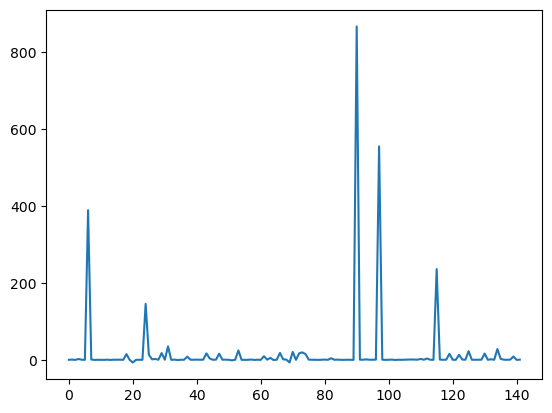

In [12]:
table
with open(csvfile, "w") as file1: 
  file1.write(table.to_csv())



      PDB  resolution  year  affinity       kd/ki  embedding_factor  \
0    1mq5        2.10  2003      9.00      Ki=1nM          0.793933   
1    2idw        1.10  2006      8.89    Ki=1.3nM          0.899889   
2    1swg        1.80  1998      7.36   Kd=43.9nM          0.832940   
3    1gpn        2.35  2002      6.48  Ki=0.334uM          0.979791   
4    1ws4        1.90  2005      3.00   Kd=1.00mM          0.709806   
..    ...         ...   ...       ...         ...               ...   
103  2boh        2.20  2006      8.52      Ki=3nM          0.832182   
104  3d7z        2.10  2008      7.92     Ki=12nM          0.971609   
105  2psv        1.75  2007      7.24     Ki=58nM          0.927222   
106  1ele        2.00  1995      6.85   Ki=0.14uM          0.704402   
107  1hmt        1.40  1995      5.79   Kd=1.64uM          0.771558   

     complex_nha  lig_nha      distB  \
0           2427       34  17.424027   
1           1803       38   4.884697   
2           3812       16  

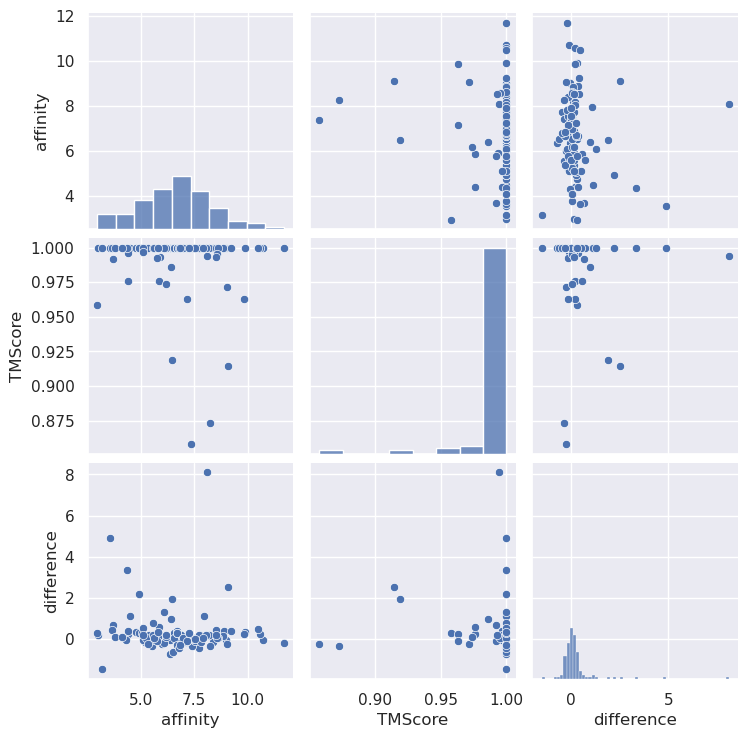

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(); 

csvfile = "/home/miemie/Dropbox/Documents/BetaPose/test142.csv"; 
table = pd.read_csv(csvfile, index_col=0); 

table["difference"] = table.distA-table.distB
table = table

st = (table.TMScore > 0.85) * (table.difference < 10)
# st = (table.difference > 4) * (table.difference < 10)
table_2 = table[st]
table_2 = table_2.reset_index(drop=1)
print(table_2)
print(len(table_2))

cols = table_2[["affinity", "TMScore", "difference"]] 
sns.pairplot(cols)

In [5]:
csvfile = "/home/miemie/Dropbox/Documents/BetaPose/AfterPrep_108_142.csv"; 
with open(csvfile, "w") as file1: 
  file1.write(table_2.to_csv())